# Fashion Dataset Practice

In [104]:
import pandas as pd

In [105]:
data = pd.read_csv("DataSets/FashionDataset.csv")

In [106]:
"""
Deleting redundunt columns
renaming columns for better understanding
droping duplicates
remove Nan in datasets
check for some more transformations
"""

'\nDeleting redundunt columns\nrenaming columns for better understanding\ndroping duplicates\nremove Nan in datasets\ncheck for some more transformations\n'

In [107]:
data.columns = data.columns.str.capitalize()
data.drop(columns=['Unnamed: 0'], inplace=True)

In [108]:
data.rename(columns={"Deatils": "Details"}, inplace=True)

<Axes: >

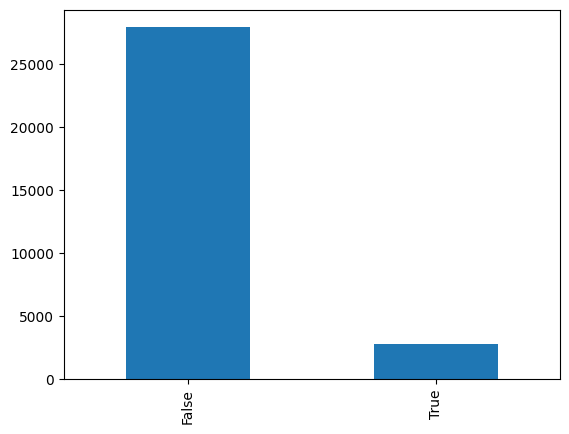

In [109]:
data.duplicated().value_counts().plot(kind='bar')

In [110]:
data.drop_duplicates(inplace=True)

In [111]:
data.reset_index().drop(columns=['index'], inplace=True)

In [112]:
data

,Brandname,Details,Sizes,Mrp,Sellprice,Discount,Category
0,life,solid cotton blend collar neck womens a-line d...,"Size:Large,Medium,Small,X-Large,X-Small",Rs\n1699,849,50% off,Westernwear-Women
1,only,polyester peter pan collar womens blouson dres...,"Size:34,36,38,40",Rs\n3499,2449,30% off,Westernwear-Women
2,fratini,solid polyester blend wide neck womens regular...,"Size:Large,X-Large,XX-Large",Rs\n1199,599,50% off,Westernwear-Women
3,zink london,stripes polyester sweetheart neck womens dress...,"Size:Large,Medium,Small,X-Large",Rs\n2299,1379,40% off,Westernwear-Women
4,life,regular fit regular length denim womens jeans ...,"Size:26,28,30,32,34,36",Rs\n1699,849,50% off,Westernwear-Women
...,...,...,...,...,...,...,...
30752,shaya by caratlane,the wing woman clover charm necklace,Nan,Nan,1250,Nan,Jewellery-Women
30753,swarovski,crystal stylish womens rodhium earrings,Nan,Nan,8950,Nan,Jewellery-Women
30755,jewelz,ethnic gold plated jhumki earrings,Nan,Rs\n1839,643,65% off,Jewellery-Women
30756,estelle,womens gold plated double line fancy white and...,Nan,Nan,2799,Nan,Jewellery-Women


In [113]:
data.isna().sum()

Brandname    0
Details      0
Sizes        0
Mrp          0
Sellprice    0
Discount     0
Category     0
dtype: int64

In [114]:
data['Brandname'] = data['Brandname'].str.capitalize()
data['Details'] = data['Details'].str.capitalize()

In [115]:
data['Sizes'] = data['Sizes'].replace('Nan', "Na Values")

In [116]:
data['Discount'] = data['Discount'].str.replace('Nan', 'No discount')

In [117]:
data['Mrp'] = data['Mrp'].str.replace('Nan', '0').str.extract('(\d+)').astype(int)

In [118]:
data['Mrp']

0        1699
1        3499
2        1199
3        2299
4        1699
         ... 
30752       0
30753       0
30755    1839
30756       0
30757       0
Name: Mrp, Length: 27931, dtype: int64

In [119]:
# Here Is complete Data Cleaning now we are going to start our basic operations

Grouping and aggregation

In [120]:
data.groupby("Brandname").size()
data.columns

Index(['Brandname', 'Details', 'Sizes', 'Mrp', 'Sellprice', 'Discount',
       'Category'],
      dtype='object')

In [121]:
data['Brandname'].unique()

array(['Life', 'Only', 'Fratini', 'Zink london', 'Kraus', 'Rare',
       'Van heusen', 'Nan', 'Stop', 'Zink z', 'Cover story', 'Infuse',
       'Allen solly', 'Altlife', 'Madame', 'Iti', 'Levis', 'And',
       'Faballey', 'Latin quarters', 'Sera', 'Adidas', 'Pepe', 'Indya',
       'Juniper', 'Lovegen', 'Vero moda', 'Forever new', 'Magre',
       'Insense', 'Calvin klein underwear', 'Reebok', 'Marie claire',
       'Enamor', 'Spykar', 'Get wrapped', 'Campus sutra', 'Dolce crudo',
       'Emblaze', 'Global desi', 'Jealous 21', 'Jockey', 'Crimsoune club',
       'Haute curry', 'Proline', 'Puma', 'Ivy', 'Vh flex', 'Myshka',
       'Femina flaunt', 'W', '109f', 'Gipsy', 'Samshek', 'Is.u',
       'Miss chase', 'Ira soleil', 'Fila', 'Kami kubi', 'Travel blue',
       'Varanga', 'De moza', 'U.s. polo assn.', 'Vip', 'Janasya',
       'Skechers', 'Lee cooper', 'Aarke', 'Kashish', 'Pepe kids',
       'Kenneth cole', 'Zingg', 'Ayesha', 'Elliza donatein', 'Erotissch',
       'Biba', 'Ed hardy', 'Bl

In [122]:
data['Mrp'].mean()

np.float64(1968.180480469729)

In [123]:
data['Sellprice'] = data['Sellprice'].str.replace('Nan', '0').str.extract('(\d+)').astype(int)

In [124]:
data['Sellprice'].mean()

np.float64(1932.833983745659)

In [125]:
data['Discount'].max()

'No discount'

In [126]:
data.groupby('Brandname').size().reset_index(name='Total_Products')


,Brandname,Total_Products
0,109f,114
1,18.21 man made,1
2,4711,1
3,Aarke,45
4,Abercrombie & fitch,5
...,...,...
270,Zingg,3
271,Zink london,909
272,Zink z,35
273,Ziyaa,515


In [127]:
data.groupby('Brandname')["Mrp"].mean()

Brandname
109f                   1166.877193
18.21 man made            0.000000
4711                   3900.000000
Aarke                    42.222222
Abercrombie & fitch    4160.000000
                          ...     
Zingg                     0.000000
Zink london            2152.080308
Zink z                    0.000000
Ziyaa                  2580.712621
Zoop                      0.000000
Name: Mrp, Length: 275, dtype: float64

In [128]:
data.groupby('Brandname')['Sellprice'].mean()

Brandname
109f                   1025.578947
18.21 man made         5500.000000
4711                   3120.000000
Aarke                  3114.222222
Abercrombie & fitch    4428.000000
                          ...     
Zingg                   199.000000
Zink london            1048.471947
Zink z                 1676.142857
Ziyaa                  1045.258252
Zoop                    995.000000
Name: Sellprice, Length: 275, dtype: float64

In [129]:
data.columns

Index(['Brandname', 'Details', 'Sizes', 'Mrp', 'Sellprice', 'Discount',
       'Category'],
      dtype='object')

In [133]:
data.groupby('Brandname').mean(numeric_only=True)


,Mrp,Sellprice
Brandname,,
109f,1166.877193,1025.578947
18.21 man made,0.000000,5500.000000
4711,3900.000000,3120.000000
Aarke,42.222222,3114.222222
Abercrombie & fitch,4160.000000,4428.000000
...,...,...
Zingg,0.000000,199.000000
Zink london,2152.080308,1048.471947
Zink z,0.000000,1676.142857
